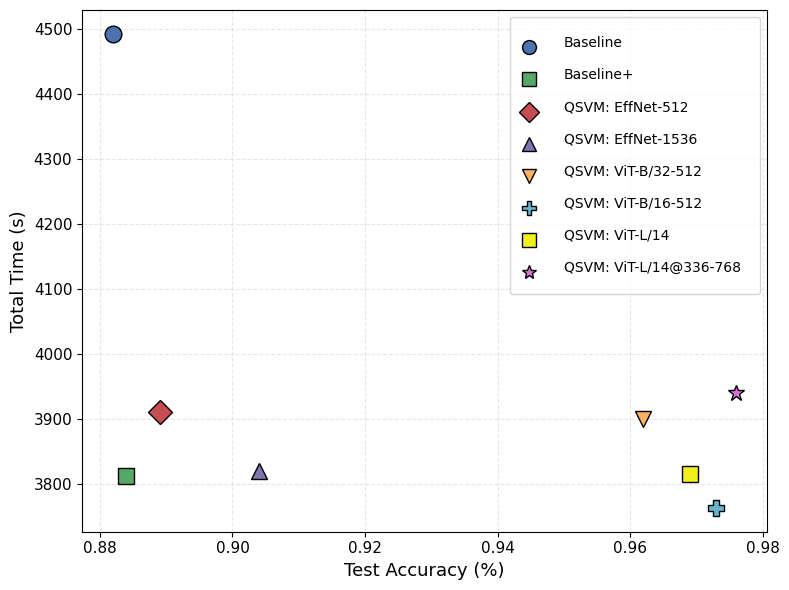

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.legend_handler import HandlerBase

# Create output directory if it doesn't exist
os.makedirs("./images", exist_ok=True)

# Load and preprocess the CSV
dataset_name = "mnist" 
df = pd.read_csv("16qubit_mnist.csv")
# dataset_name = "fmnist" 
# df = pd.read_csv("16qubit_fmnist.csv")

# Extract only the mean value (left of ±) from relevant columns
for col in ["Test_Acc", "Precision", "F1", "AUC", "Total_Time", "Peak_Memory_Usage"]:
    df[col] = df[col].str.extract(r"([\d.]+)").astype(float)

# Style configuration for each model
MODEL_INFO = {
    "Baseline": {"color": "#4C72B0", "marker": "o"},
    "Baseline+": {"color": "#55A868", "marker": "s"},
    "QSVM: EffNet-512": {"color": "#C44E52", "marker": "D"},
    "QSVM: EffNet-1536": {"color": "#8172B2", "marker": "^"},
    "QSVM: ViT-B/32-512": {"color": "#FDB462", "marker": "v"},
    "QSVM: ViT-B/16-512": {"color": "#64B5CD", "marker": "P"},
    "QSVM: ViT-L/14": {"color": "#f0f01d", "marker": "s"},
    "QSVM: ViT-L/14@336-768": {"color": "#DA70D6", "marker": "*"},
}

# Custom legend styling
class SmallLegendHandler(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        return [
            plt.Line2D([0], [0],
                       marker=orig_handle.get_marker(),
                       color=orig_handle.get_color(),
                       markerfacecolor=orig_handle.get_markerfacecolor(),
                       markeredgecolor="black",
                       markersize=10,
                       linestyle="None",
                       transform=trans)
        ]

# Plotting function
def plot_total_time_vs_test_acc(df, exp_name):
    fig, ax = plt.subplots(figsize=(8, 6))
    legend_map = {}

    for _, row in df.iterrows():
        model = row["Experiment"]
        if model in MODEL_INFO:
            color = MODEL_INFO[model]["color"]
            marker = MODEL_INFO[model]["marker"]
            point, = ax.plot(
                row["Test_Acc"],
                row["Total_Time"],
                marker=marker,
                markersize=12,
                linestyle="None",
                color=color,
                markerfacecolor=color,
                markeredgecolor="black",
                label=model
            )
            legend_map[model] = point

    ax.legend(
        legend_map.values(),
        legend_map.keys(),
        loc="upper right",
        fontsize=10,
        borderpad=1.4,
        handletextpad=0.5,
        labelspacing=1.3,
        columnspacing=1.0,
        alignment="center",
        handler_map={v: SmallLegendHandler() for v in legend_map.values()}
    )

    ax.set_xlabel("Test Accuracy (%)", fontsize=13)
    ax.set_ylabel("Total Time (s)", fontsize=13)
    ax.grid(True, linestyle="--", alpha=0.3)
    ax.tick_params(axis='both', labelsize=11)

    plt.tight_layout()
    plt.savefig(f"images/Total_Time_vs_Test_Accuracy_{exp_name}.svg", bbox_inches="tight")
    plt.savefig(f"images/Total_Time_vs_Test_Accuracy_{exp_name}.png", dpi=300, bbox_inches="tight")
    plt.show()

# Run the plot
plot_total_time_vs_test_acc(df, exp_name=dataset_name)